<a href="https://colab.research.google.com/github/Kot71nsk/FakeNews/blob/main/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%E2%84%96_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas scikit-learn seaborn matplotlib

In [ ]:
!wget https://storage.yandexcloud.net/academy.ai/practica/fake_news.csv

--2024-12-14 09:08:02--  https://storage.yandexcloud.net/academy.ai/practica/fake_news.csv
Resolving storage.yandexcloud.net (storage.yandexcloud.net)... 213.180.193.243, 2a02:6b8::1d9
Connecting to storage.yandexcloud.net (storage.yandexcloud.net)|213.180.193.243|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30696129 (29M) [text/csv]
Saving to: ‘fake_news.csv’

fake_news.csv       100%[===================>]  29.27M  9.41MB/s    in 4.3s    

2024-12-14 09:08:08 (6.83 MB/s) - ‘fake_news.csv’ saved [30696129/30696129]



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Загрузка данных
df = pd.read_csv('fake_news.csv')
df.tail()

,Unnamed: 0,title,text,label
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL
6334,4330,Jeb Bush Is Suddenly Attacking Trump. Here's W...,Jeb Bush Is Suddenly Attacking Trump. Here's W...,REAL


              precision    recall  f1-score   support

        FAKE       0.95      0.95      0.95       313
        REAL       0.95      0.95      0.95       321

    accuracy                           0.95       634
   macro avg       0.95      0.95      0.95       634
weighted avg       0.95      0.95      0.95       634



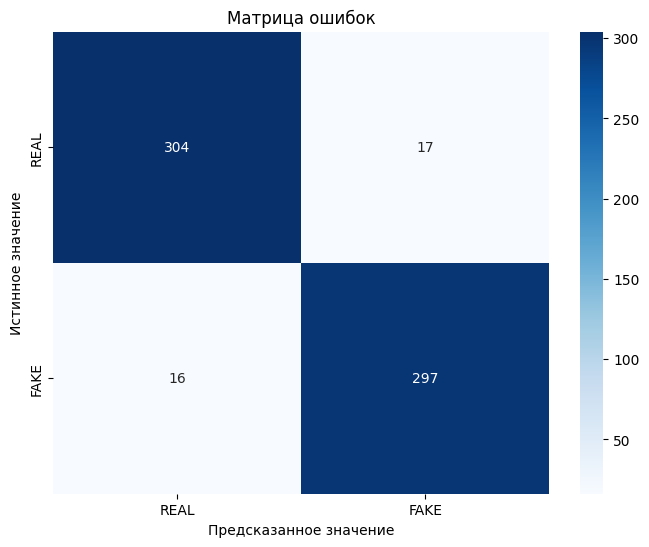

In [ ]:


# Обработка пропущенных значений (если есть)
#df.dropna(inplace=True)

# Разделение данных на признаки (текст) и целевую переменную (REAL/FAKE)
X = df['text']
y = df['label']

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=7)

# Применение TfidfVectorizer для преобразования текстовых данных в числовые признаки
vectorizer = TfidfVectorizer(stop_words='english')  # Используем стоп-слова
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Обучение модели PassiveAggressiveClassifier
pac = PassiveAggressiveClassifier(max_iter=50, random_state=7)
pac.fit(X_train_vec, y_train)

# Предсказание на тестовой выборке
y_pred = pac.predict(X_test_vec)

# Оценка модели
print(classification_report(y_test, y_pred))

# Матрица ошибок
cm = confusion_matrix(y_test, y_pred, labels=['REAL', 'FAKE'])

# Визуализация матрицы ошибок
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['REAL', 'FAKE'], yticklabels=['REAL', 'FAKE'])
plt.xlabel('Предсказанное значение')
plt.ylabel('Истинное значение')
plt.title('Матрица ошибок')
plt.show()

